# Assignment 3

## Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import matplotlib as mpl
import datetime
from scipy import stats
from sklearn.metrics import mean_absolute_error as mae

In [2]:
EirGrid = pd.read_csv("EirGridSystemDemand2014.csv")
EirGrid.head()

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0


In [3]:
date_time = EirGrid['Date'].astype(str) + EirGrid['Time'].astype(str)
EirGrid["date_time"] = pd.to_datetime(date_time, format = '%m/%d/%Y%H:%M')
EirGrid.head()

,Date,Time,Demand,date_time
0,1/1/2014,0:00,2899.0,2014-01-01 00:00:00
1,1/1/2014,0:15,2869.0,2014-01-01 00:15:00
2,1/1/2014,0:30,2827.0,2014-01-01 00:30:00
3,1/1/2014,0:45,2787.0,2014-01-01 00:45:00
4,1/1/2014,1:00,2724.0,2014-01-01 01:00:00


In [4]:
EirGrid.describe()

,Demand
count,35035.000000
mean,2943.380534
std,599.651709
min,1665.000000
25%,2426.000000
50%,3014.000000
75%,3378.000000
max,4614.000000


In [5]:
EirGrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35040 non-null  object        
 1   Time       35040 non-null  object        
 2   Demand     35035 non-null  float64       
 3   date_time  35040 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ MB


In [6]:
EirGrid = EirGrid.interpolate()

In [7]:
EirGrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35040 non-null  object        
 1   Time       35040 non-null  object        
 2   Demand     35040 non-null  float64       
 3   date_time  35040 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ MB


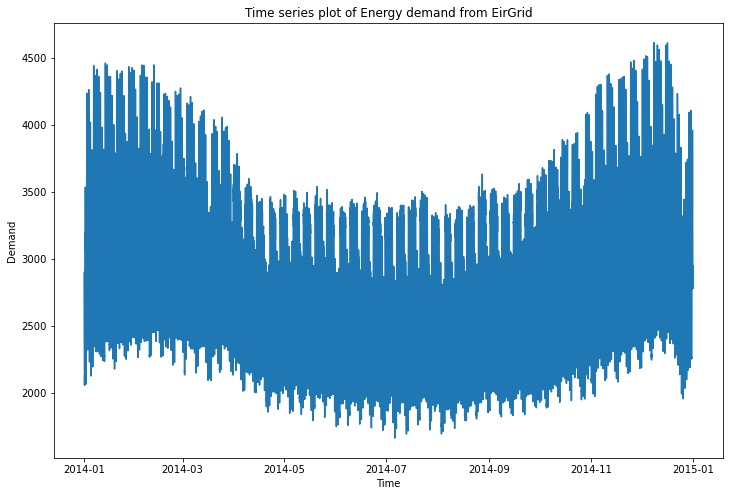

In [8]:
plt.figure(figsize = (12, 8))
plt.plot(EirGrid.date_time, EirGrid.Demand)
plt.ylabel("Demand")
plt.xlabel("Time")
plt.title("Time series plot of Energy demand from EirGrid")
plt.show()

## Question 2

In [9]:
# Calculate the Autocorrelation coefficient for 10 days
coef = sm.tsa.acf(EirGrid.Demand, nlags=960)
coef = pd.DataFrame(coef)
coef.columns = ["Autocorrelation Coefficient"]
coef

C:\Users\Courage Ekoh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,Autocorrelation Coefficient
0,1.000000
1,0.996103
2,0.985689
3,0.969448
4,0.948211
...,...
956,0.746984
957,0.764598
958,0.777886
959,0.786296


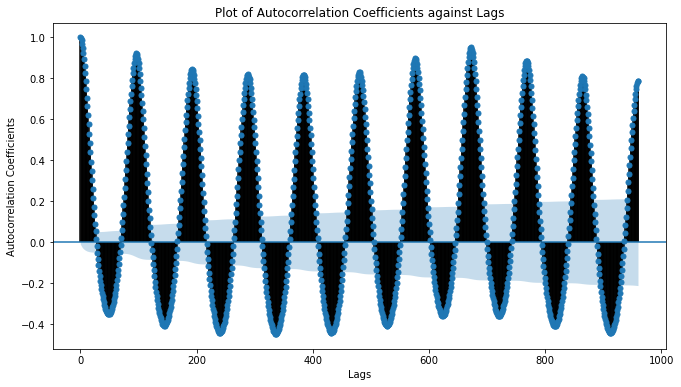

In [10]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(11,6))
    fig = tsaplots.plot_acf(EirGrid.Demand, lags=960)
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation Coefficients")
    plt.title("Plot of Autocorrelation Coefficients against Lags")
    plt.show()

## Question 3

In [11]:
EirGrid["time_of_year"] = EirGrid.date_time.dt.dayofyear/365

In [12]:
EirGrid[["time_of_year"]]

,time_of_year
0,0.00274
1,0.00274
2,0.00274
3,0.00274
4,0.00274
...,...
35035,1.00000
35036,1.00000
35037,1.00000
35038,1.00000


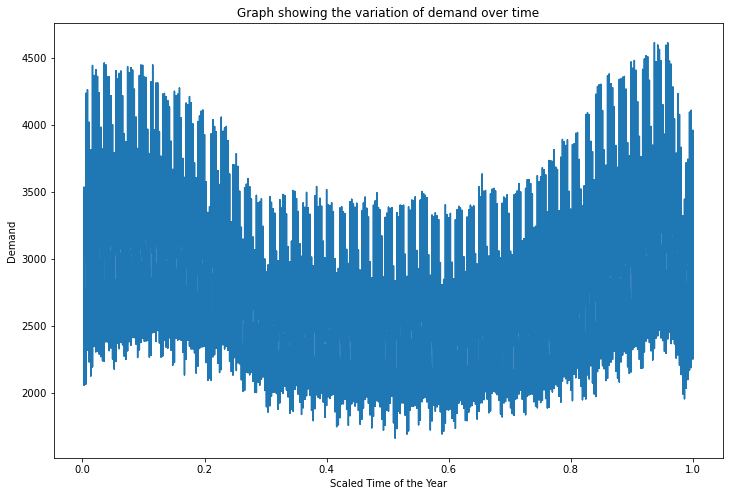

In [13]:
plt.figure(figsize = (12, 8))
plt.plot(EirGrid.time_of_year, EirGrid.Demand)
plt.xlabel("Scaled Time of the Year")
plt.ylabel("Demand")
plt.title("Graph showing the variation of demand over time")
plt.show()

## Question 4

In [14]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
avg_demand = pd.DataFrame(EirGrid.groupby(EirGrid.date_time.dt.month, as_index=False)["Demand"].mean())
avg_demand.columns = ["Average Demand"]
avg_demand.index = months
avg_demand

,Average Demand
Jan,3226.265793
Feb,3247.410342
Mar,3093.453629
Apr,2844.273264
May,2767.462030
Jun,2695.365278
Jul,2695.177083
Aug,2681.552419
Sep,2806.761111
Oct,2933.151210


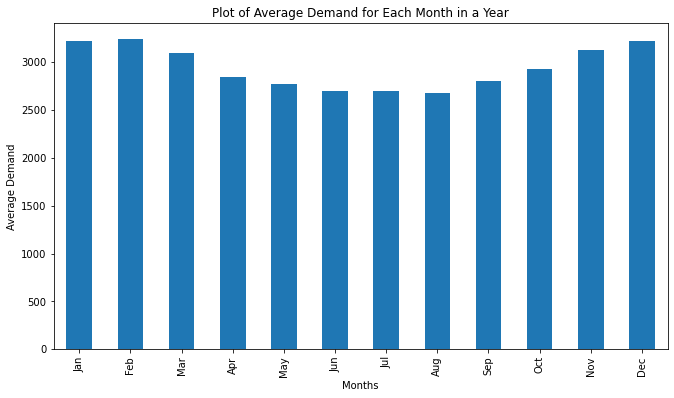

In [15]:
fig, ax = plt.subplots(figsize = (11, 6))
EirGrid.groupby(EirGrid.date_time.dt.month)["Demand"].mean().plot.bar()
plt.xlabel("Months")
plt.ylabel("Average Demand")
plt.title("Plot of Average Demand for Each Month in a Year")
ax.set_xticklabels(months)
plt.show()

## Question 5

In [16]:
resampled_hour = EirGrid[["date_time", "Demand"]].set_index("date_time").resample("H").sum()
hourly_demand = pd.DataFrame(resampled_hour.groupby(resampled_hour.index.hour, as_index=False)["Demand"].mean())
hourly_demand.columns = ["Average Hourly Demand"]
hourly_demand

,Average Hourly Demand
0,10125.076712
1,9322.482192
2,8775.742466
3,8490.868493
4,8409.920548
5,8464.260274
6,9088.372603
7,10647.189041
8,11960.821918
9,12771.024658


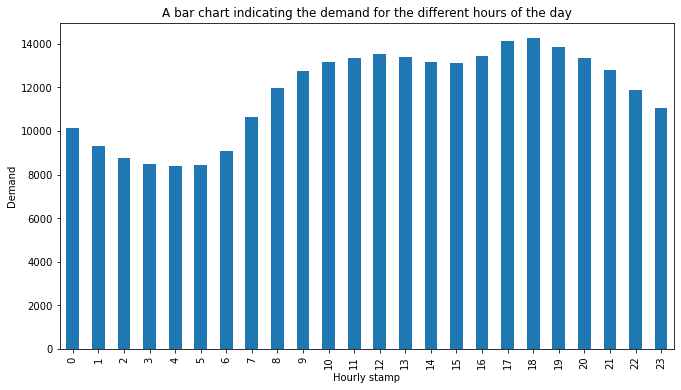

In [17]:
fig, ax = plt.subplots(figsize = (11, 6))
resampled_hour.groupby(resampled_hour.index.hour)["Demand"].mean().plot.bar()
plt.xlabel("Hourly stamp")
plt.ylabel("Demand")
plt.title("A bar chart indicating the demand for the different hours of the day")
plt.show()

## Question 6

In [18]:
week_day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
avg_demand = pd.DataFrame(EirGrid.groupby(EirGrid.date_time.dt.dayofweek, as_index=False)["Demand"].mean())
avg_demand.columns = ["Average Demand"]
avg_demand.index = week_day
avg_demand

,Average Demand
Mon,2966.307292
Tue,3052.404647
Wed,3059.144458
Thu,3063.700521
Fri,3031.418470
Sat,2783.925681
Sun,2644.316707


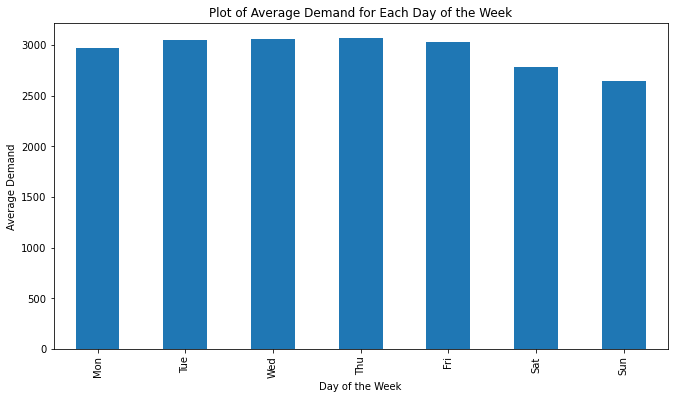

In [19]:
fig, ax = plt.subplots(figsize = (11, 6))
EirGrid.groupby(EirGrid.date_time.dt.dayofweek)["Demand"].mean().plot.bar()
plt.xlabel("Day of the Week")
plt.ylabel("Average Demand")
plt.title("Plot of Average Demand for Each Day of the Week")
ax.set_xticklabels(week_day)
plt.show()

## Question 7

In [20]:
demand_profile = EirGrid.groupby([EirGrid.date_time.dt.dayofweek, EirGrid.date_time.dt.hour])["Demand"].mean()
df_demand_profile = pd.DataFrame()

for i, j in zip(range(7), week_day):
    df_demand_profile[j] = demand_profile[i]
print("Demand profile for each day of the week")    
df_demand_profile

Demand profile for each day of the week


,Mon,Tue,Wed,Thu,Fri,Sat,Sun
date_time,,,,,,,
0,2391.326923,2510.788462,2553.466981,2563.740385,2580.211538,2609.100962,2509.822115
1,2212.317308,2318.504808,2351.047170,2355.471154,2375.052885,2386.254808,2315.302885
2,2093.615385,2193.745192,2220.330189,2220.687500,2235.759615,2226.533654,2166.370192
3,2032.706731,2130.639423,2155.500000,2158.735577,2168.706731,2138.514423,2073.586538
4,2023.168269,2121.923077,2140.292453,2146.048077,2153.413462,2101.947115,2029.841346
5,2050.812500,2148.014423,2164.051887,2176.403846,2179.826923,2089.961538,2002.461538
6,2245.923077,2354.802885,2369.641509,2380.985577,2378.764423,2156.581731,2016.076923
7,2704.875000,2856.302885,2865.608491,2880.221154,2865.163462,2343.307692,2113.182692
8,3075.024038,3233.456731,3235.207547,3249.216346,3232.235577,2607.961538,2293.625000


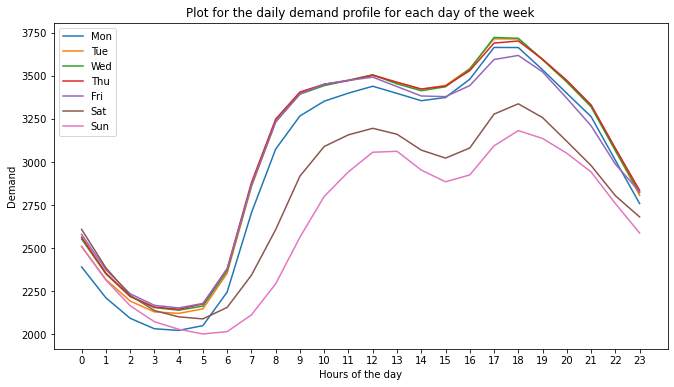

In [21]:
fig, ax = plt.subplots(figsize = (11, 6))

for i, j in zip(range(7), week_day):
    ax.plot(demand_profile[i], label = j)
    
plt.legend()
plt.xticks([x for x in range(24)])
plt.ylabel("Demand")
plt.xlabel("Hours of the day")
plt.title("Plot for the daily demand profile for each day of the week")
plt.show()

## Question 8

In [22]:
EirGrid["day_of_the_week"] = EirGrid.date_time.dt.dayofweek
weekends = EirGrid["day_of_the_week"][EirGrid["day_of_the_week"]>=5]
weekdays = EirGrid["day_of_the_week"][EirGrid["day_of_the_week"] < 5]

stats.ttest_ind(weekdays, weekends)

Ttest_indResult(statistic=-241.78639956312395, pvalue=0.0)

## Question 9

In [23]:
slice = int(len(EirGrid)/2)
training = EirGrid[["Demand"]]
evaluation = EirGrid[["Demand"]].iloc[slice:]

n = [x for x in range(1, 97)]
MAE = []
for i in n:
    training['Persistence_' +str(i)] = training.Demand.shift(i)
    

for i in training.drop(columns = ["Demand"]).columns:
    MAE.append(mae(evaluation["Demand"], training[i].iloc[slice:]))

<ipython-input-23-175c5e8fabe2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Persistence_' +str(i)] = training.Demand.shift(i)


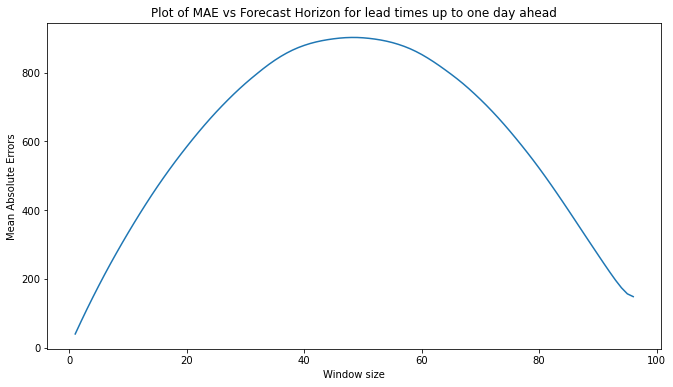

In [24]:
plt.figure(figsize = (11, 6))
plt.plot(n, MAE)
plt.xlabel("Window size")
plt.ylabel("Mean Absolute Errors")
plt.title("Plot of MAE vs Forecast Horizon for lead times up to one day ahead")
plt.show()

## Question 10

In [25]:
EPSILON = 1e-10
def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)

def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))

In [26]:
MAPE = []
for i in training.drop(columns = ["Demand"]).columns:
    MAPE.append(mape(evaluation["Demand"], training[i].iloc[slice:]))

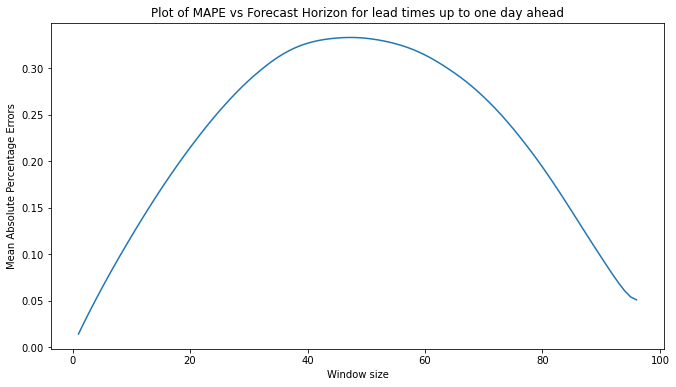

In [27]:
plt.figure(figsize = (11, 6))
plt.plot(n, MAPE)
plt.xlabel("Window size")
plt.ylabel("Mean Absolute Percentage Errors")
plt.title("Plot of MAPE vs Forecast Horizon for lead times up to one day ahead")
plt.show()